In [1]:
import numpy as np
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
import os
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

Decision trees are very versatile ml algorithms and can be used for regression, classification and multioutput classifications. They are the main components of random forests

## Fetching the **data** and splitting into training and test sets

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### **Preparing data** for algorithms
- Data cleaning
- Categorical encoding
- Custom transformers
- Feature scaling
- Transformation pipelines

## Select Algorithm and **Train Model**
- Select model
- Train model
- Evaluate Accuracy
     - Cross validation

#### Decision Tree Classifier

In [6]:
# Decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [9]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

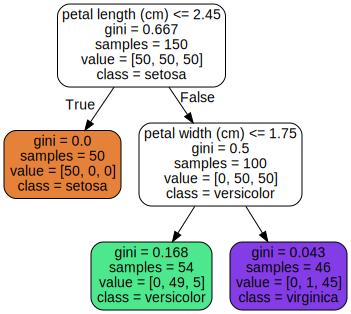

In [12]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

NB: from cmd `dot -Tpng currentfilename.dot -o newfilename.png`

For a flower with 5cm petal length, i.5cm petal width:-

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

it predicts 0% isris setosa, 90.7% iris versicolor and 9.3% iris virginica

NB:- Decision trees uses CART classification and regression tree algorithm which greedily searches for an optimum split at the top level and repeats process at every subsequent level untill it reaches maximum depth. Finding an optimal tree is an NP-Complete problem, with O(exp(m)) complexity hence the need to "settle" for "reasonably good" models

#### Decision Treee Regressor

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [17]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

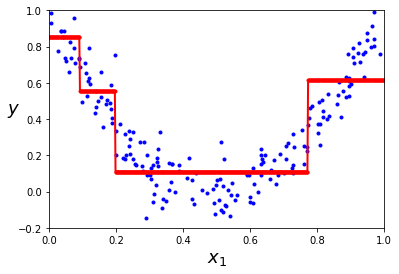

In [19]:
plot_regression_predictions(tree_reg, X, y)

In [20]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        rounded=True,
        filled=True
    )

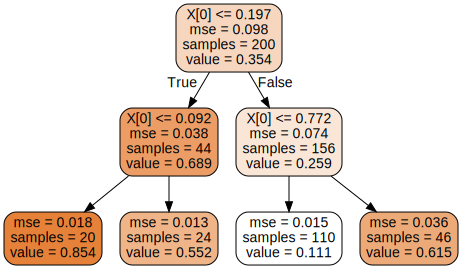

In [21]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

- Decision trees are prone to overfitting unless constrained ie regualrized by setting a reduced min_samples_leaf and max_depth values

#### Example of selecting best tree hyperparameters with grid search

In [24]:
from sklearn.datasets import make_moons

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.metrics import accuracy_score

In [25]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [30]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [32]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695